# K-Means Clustering for Brief COPE Questionnaire

In this project, we apply the k-means clustering algorithm to cluster the coping strategies. The goal is to identify distinct groups of **coping strategies** that influence `resilience`. To do this, we first use different feature selection methods to extract important strategies that influence `resilience`. Then, we employ k-means clustering to cluster these coping strategies. Finally, by comparing the obtained clusters, strategies that can improve resilience are introduced.

   


In [2]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pyreadstat
import warnings
warnings.filterwarnings('ignore')


In [33]:
df, meta=pyreadstat.read_sav('konzas2.sav')

In [34]:
df.head(3)

,wb1,wb2,wb3,wb4,wb5,wb6,wb7,wb8,wb9,wb10,...,Behavioral_disengagement,Venting,Positive_reframing,Planning,Humor,Acceptance,Religion,Self_blame,res,well
0,2.0,2.0,3.0,3.0,3.0,2.0,3.0,4.0,2.0,3.0,...,2.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,62.0,42.0
1,4.0,5.0,4.0,5.0,4.0,3.0,4.0,4.0,4.0,3.0,...,3.0,5.0,3.0,1.0,3.0,4.0,4.0,3.0,80.0,56.0
2,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,2.0,3.0,3.0,1.0,4.0,2.0,2.0,68.0,44.0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 74 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   wb1                       255 non-null    float64
 1   wb2                       253 non-null    float64
 2   wb3                       254 non-null    float64
 3   wb4                       254 non-null    float64
 4   wb5                       254 non-null    float64
 5   wb6                       253 non-null    float64
 6   wb7                       254 non-null    float64
 7   wb8                       254 non-null    float64
 8   wb9                       253 non-null    float64
 9   wb10                      254 non-null    float64
 10  wb11                      254 non-null    float64
 11  wb12                      254 non-null    float64
 12  wb13                      254 non-null    float64
 13  wb14                      254 non-null    float64
 14  rs1       

In [36]:
df=df.dropna()

In [37]:
y=df['res']
X=df[['Self_distraction','Active_coping','Denial','Substance_use','Emotional_support','UIS','Behavioral_disengagement','Venting','Positive_reframing','Planning','Humor','Acceptance','Religion','Self_blame']]


<Axes: xlabel='res', ylabel='Density'>

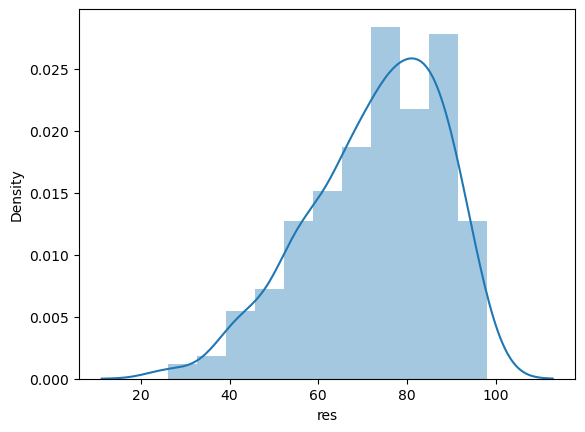

In [38]:
sns.distplot(y)

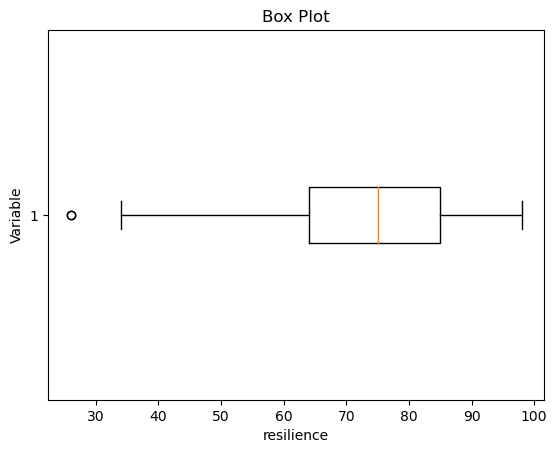

In [39]:
plt.boxplot(y, vert=False)
plt.ylabel('Variable')
plt.xlabel('resilience')
plt.title('Box Plot')
plt.show()

In [40]:
df1=df[['res','Self_distraction','Active_coping','Denial','Substance_use','Emotional_support','UIS','Behavioral_disengagement','Venting','Positive_reframing','Planning','Humor','Acceptance','Religion','Self_blame']]
df1.head(3)

,res,Self_distraction,Active_coping,Denial,Substance_use,Emotional_support,UIS,Behavioral_disengagement,Venting,Positive_reframing,Planning,Humor,Acceptance,Religion,Self_blame
0,62.0,2.0,4.0,2.0,0.0,4.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0
1,80.0,5.0,4.0,4.0,2.0,2.0,6.0,3.0,5.0,3.0,1.0,3.0,4.0,4.0,3.0
2,68.0,4.0,3.0,2.0,1.0,4.0,3.0,3.0,2.0,3.0,3.0,1.0,4.0,2.0,2.0


## 1. Feature selection 
There are several feature selection methods commonly used in machine learning. Here,  we employ a few popular ones in order to identify the most important features that can affect "resilience"



## 1.1: Correlations

Features that have high correlation with the target variable are considered important.

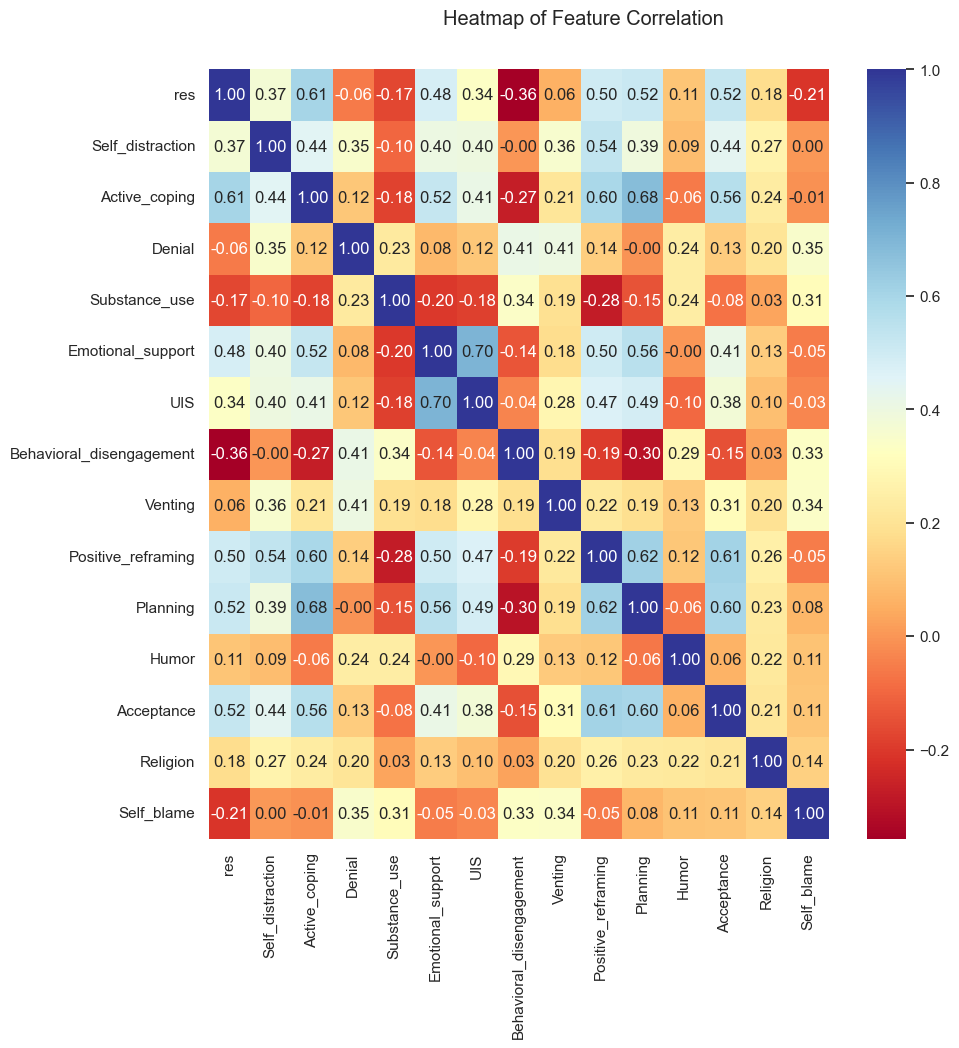

In [41]:
sns.set_theme(style="whitegrid")
chart = 'Heatmap of Feature Correlation'

plt.figure(figsize=(10, 10))
plt.suptitle(f'{chart}', y=0.94)

# plotting a heatmap of feature correlation 
sns.heatmap(df1.corr(), cmap='RdYlBu', annot=True, fmt='0.2f')
plt.show()

<div class="alert alert-block alert-info">
<b></b> 

It is observed that the variables 'Self_distraction', 'Active_coping', 'Emotional_support', 'UIS', 
'Behavioral_disengagement', 'Positive_reframing', 'Planning', 'Acceptance' have substantial correlation with "resilience".
</div>

## 1.2: L1 Regularization (Lasso)
L1 regularization can be used to induce sparsity in the model coefficients, effectively selecting a subset of features.

In [42]:
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import RepeatedKFold

In [43]:
model = Lasso()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=10)
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Config: %s' % results.best_params_)

Config: {'alpha': 0.43}


In [26]:
model = Lasso(alpha=0.43)
model1=model.fit(X, y)

In [27]:
pd.Series(model1.coef_, index = X.columns )

Self_distraction            0.567773
Active_coping               3.325780
Denial                     -0.443956
Substance_use               0.053021
Emotional_support           1.465823
UIS                         0.000000
Behavioral_disengagement   -1.588137
Venting                    -0.305732
Positive_reframing          0.000000
Planning                    0.094181
Humor                       1.495374
Acceptance                  2.207096
Religion                    0.030261
Self_blame                 -1.285680
dtype: float64

<div class="alert alert-block alert-info">
<b></b> 

The features whose coefficients in the Lasso regression model are far from zero are:
'Active_coping', 'Emotional_support', 'Behavioral_disengagement',  'Humor', 'Acceptance' and 'Self_blame'.
</div>

## 1.3: Recursive Feature Elimination (RFE)
RFE works by recursively eliminating the least important features based on model performance. It starts with all features, trains the model, and ranks the features by importance. Then, it removes the least important feature and repeats the process until a specified number of features remains.

In [28]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

In [29]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 10))}]


# step-3: perform grid search
# 3.1 specify model
lm = RandomForestRegressor()
lm.fit(X, y)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X, y)  

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=RFE(estimator=RandomForestRegressor()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9]}],
             return_train_score=True, scoring='r2', verbose=1)

In [31]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)

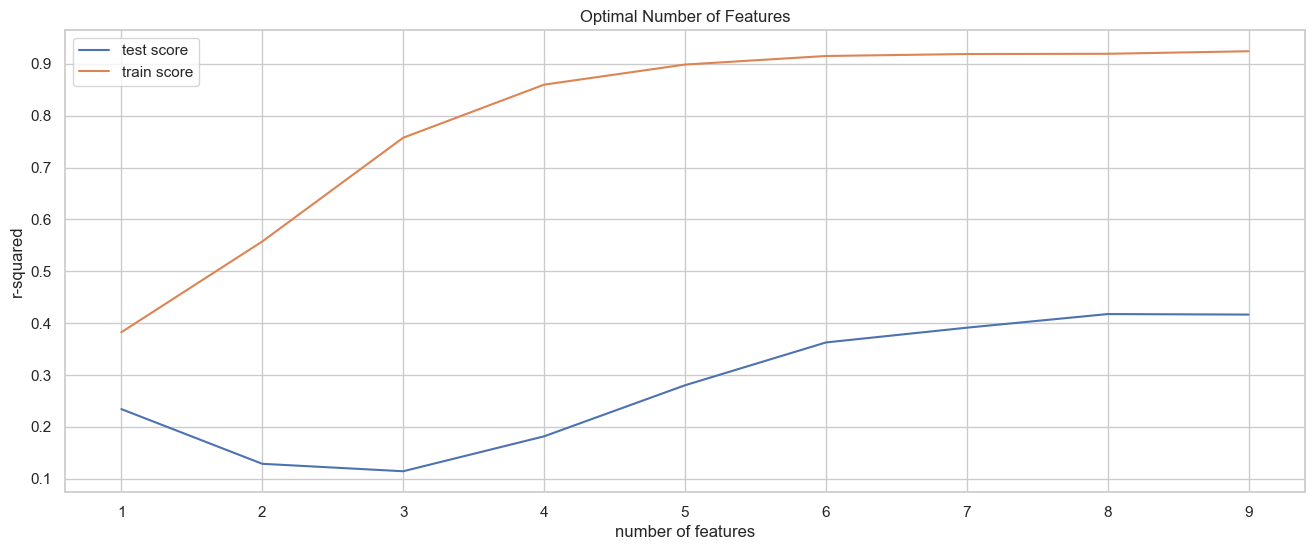

In [32]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

<div class="alert alert-block alert-info">
<b></b> 
The results recommend to select six features.
</div>

## 1.4: Feature Importance by Random Forest
This method ranks the features based on their importance derived from a specific model.

In [33]:
from sklearn.metrics import r2_score

In [34]:
# final model
n_features_optimal = 6

lm = RandomForestRegressor()
lm.fit(X, y)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X, y)

# predict prices of X_test
y_pred = lm.predict(X)
r2 = r2_score(y, y_pred)
print(r2)

0.9254329587711181


In [35]:
pd.Series(lm.feature_importances_, index = X.columns )

Self_distraction            0.036410
Active_coping               0.228135
Denial                      0.031765
Substance_use               0.039899
Emotional_support           0.095199
UIS                         0.035931
Behavioral_disengagement    0.086747
Venting                     0.028020
Positive_reframing          0.112623
Planning                    0.083223
Humor                       0.042597
Acceptance                  0.082123
Religion                    0.027418
Self_blame                  0.069911
dtype: float64

<div class="alert alert-block alert-info">
<b></b> 
Active_coping, Planning , Emotional_support, Positive_reframing, Behavioral_disengagement, Acceptance and Self_blame can be select by this method.
</div>



## 1.5: SelectFromModel
SelectFromModel is a meta-transformer that can be used with any estimator that has a coef_ or feature_importances_ attribute. 
It selects the features based on a specified threshold.

In [36]:
from sklearn.feature_selection import SelectFromModel

In [37]:
sel_ = SelectFromModel(RandomForestRegressor(random_state=10))
sel_.fit(X, y)
selected_feat = X.columns[(sel_.get_support())]
len(selected_feat)

6

In [38]:
selected_feat 

Index(['Active_coping', 'Emotional_support', 'Behavioral_disengagement',
       'Positive_reframing', 'Planning', 'Acceptance'],
      dtype='object')

### Visualizing lasso results

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [40]:
betas = []
penalties = [0.001, 0.01, 0.5, 1, 10]

for penalty in penalties:
    
    pipe = Pipeline([
        
        ("lasso", Lasso(alpha=penalty, random_state=10))
    ])

    pipe.fit(X, y)
    
    betas.append(pd.Series(pipe.named_steps["lasso"].coef_))
    
betas = pd.concat(betas, axis=1)
betas.columns = [f"{penalty}" for penalty in penalties]
betas.index = X.columns

betas.head()

,0.001,0.01,0.5,1,10
Self_distraction,0.832532,0.823992,0.529452,0.297074,0.000000
Active_coping,3.459603,3.455538,3.307433,3.192340,1.529051
Denial,-0.646760,-0.643246,-0.409725,-0.184660,-0.000000
Substance_use,0.290303,0.287816,0.010363,0.000000,-0.000000
Emotional_support,1.613288,1.603848,1.444680,1.358170,0.000000


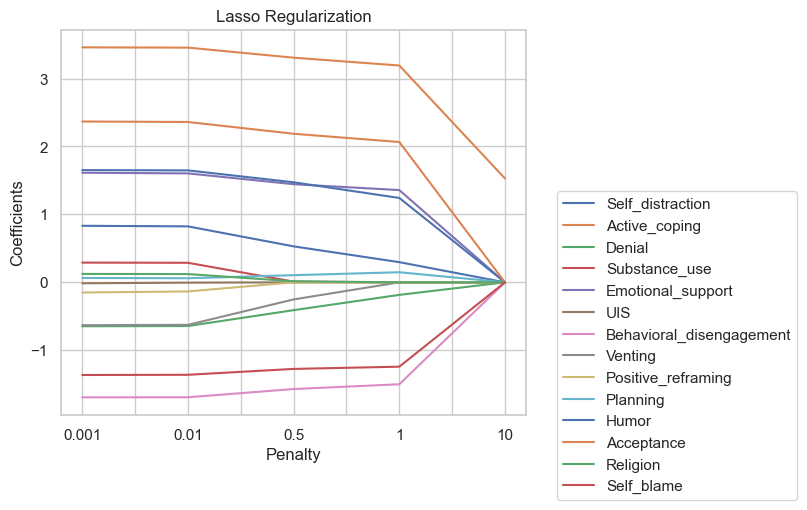

In [41]:

betas.T.plot(figsize=(6,5), legend=False)

plt.ylabel("Coefficients")
plt.xlabel("Penalty")
plt.title("Lasso Regularization")
# add legends and set its box position
plt.legend(X.columns,
           bbox_to_anchor = (1.05, 0.6)) 

<div class="alert alert-block alert-info">
<b></b> 

The features whose coefficients in the Lasso regression model are far from zero are:
'Active_coping', 'Emotional_support', 'Behavioral_disengagement',  'Humor', 'Acceptance' and 'Self_blame'.
</div>

<div class="alert alert-block alert-info">

<b>Summary of feature selection:</b> The main features that are particularly important in influencing resilience are:
Active_coping, Planning , Emotional_support, Positive_reframing, Acceptance, Behavioral_disengagement, Humor, Self_blame

</div>

# 2: K-means clustering
Once the relevant coping strategies are identified, we utilize the k-means clustering algorithm to group them into distinct clusters based on their similarities. 

In [8]:
# dataframe of interested variables

df2=df[['sex', 'age',
       'Active_coping','Emotional_support', 'Behavioral_disengagement', 
       'Positive_reframing','Planning','Humor','Acceptance','Self_blame','res']]

In [9]:
# features
col_names = [ 'Active_coping', 'Emotional_support', 'Behavioral_disengagement', 
       'Positive_reframing', 'Humor', 'Acceptance', 'Self_blame', 'Planning']
features = df2[col_names]

In [44]:
features

,Active_coping,Emotional_support,Behavioral_disengagement,Positive_reframing,Humor,Acceptance,Self_blame,Planning
0,4.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0
1,4.0,2.0,3.0,3.0,3.0,4.0,3.0,1.0
2,3.0,4.0,3.0,3.0,1.0,4.0,2.0,3.0
3,4.0,3.0,3.0,4.0,5.0,4.0,2.0,3.0
4,4.0,3.0,3.0,5.0,3.0,6.0,3.0,4.0
...,...,...,...,...,...,...,...,...
248,3.0,4.0,4.0,2.0,1.0,3.0,3.0,3.0
249,2.0,4.0,3.0,3.0,6.0,5.0,6.0,3.0
250,3.0,2.0,4.0,2.0,3.0,3.0,5.0,4.0
251,5.0,4.0,2.0,2.0,3.0,6.0,3.0,4.0


## 2.1: Number of clusters
An important aspect of k-means algorithm is the selection of the desired number of clusters, denoted as **k**. 
Several methods and heuristics exist to estimate the optimal number of clusters, such as the *elbow method* or *silhouette analysis*. 
Here, The `elbow method` is utilized to examine different number of clusters.

Text(0, 0.5, 'Inertia')

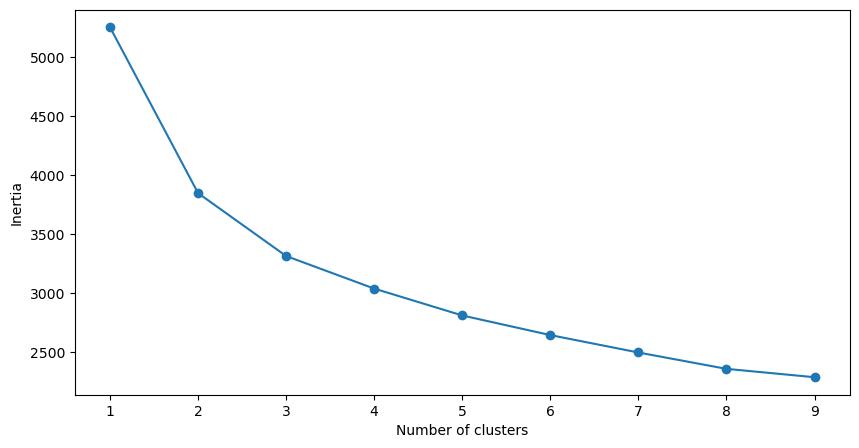

In [11]:
SSE = []

for cluster in range(1,10):
    kmeans = KMeans( n_clusters = cluster, init='k-means++')
    kmeans.fit(features)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them

frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(10,5))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

<div class="alert alert-block alert-info">

The point on the plot where the WCSS (Interia) starts to decrease at a slower rate is considered the elbow of the plot. The corresponding value of k at this point is considered the optimal number of clusters. So, it is observed from the elbow plot that choosing three clusters is suitable.

</div>

## 2.2: Conduct k-means

In [23]:
kmeans = KMeans( n_clusters = 3, init='k-means++')
kmeans.fit(features)

KMeans(n_clusters=3)

In [24]:
clusters = kmeans.fit_predict(features.iloc[:,:])
df2["label"] = clusters

In [25]:
df2.head(3)

,sex,age,Active_coping,Emotional_support,Behavioral_disengagement,Positive_reframing,Planning,Humor,Acceptance,Self_blame,res,label
0,2.0,17.0,4.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,62.0,2
1,2.0,16.0,4.0,2.0,3.0,3.0,1.0,3.0,4.0,3.0,80.0,0
2,2.0,15.0,3.0,4.0,3.0,3.0,3.0,1.0,4.0,2.0,68.0,0


In [26]:
avg_df = df2.groupby(['label'], as_index=False).mean() 
avg_df

,label,sex,age,Active_coping,Emotional_support,Behavioral_disengagement,Positive_reframing,Planning,Humor,Acceptance,Self_blame,res
0,0,1.718310,16.084507,2.718310,2.619718,2.577465,2.070423,2.183099,2.253521,2.732394,2.676056,58.788732
1,1,1.629630,16.500000,5.120370,4.675926,0.740741,4.574074,4.842593,1.814815,4.805556,1.962963,80.814815
2,2,1.716216,16.364865,4.486486,4.310811,3.162162,4.432432,4.310811,3.797297,4.716216,4.000000,74.824324


In [18]:
# the mean of resilience for men(1) and women(2)
Sex=df2['sex']
df2['res'].groupby(df2['sex']).mean() 

sex
1.0    71.493827
2.0    73.534884
Name: res, dtype: float64

In [19]:
# the mean of age in each cluster
df2['age'].groupby(df2['label']).mean() 

label
0    16.495146
1    16.054054
2    16.421053
Name: age, dtype: float64

In [20]:
# The numbers of men and women in each cluster
df3 = pd.DataFrame(df2.groupby(['label','sex'])['sex'].count())
df3.head()

sex
label sex     
0     1.0   38
      2.0   65
1     1.0   21
      2.0   53
2     1.0   22

<Axes: xlabel='label', ylabel='res'>

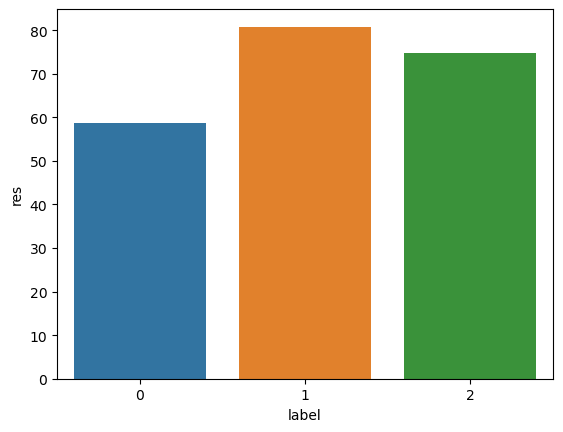

In [27]:
# visualizing the mean of resilience in each cluster
sns.barplot(x='label',y='res', data=avg_df)

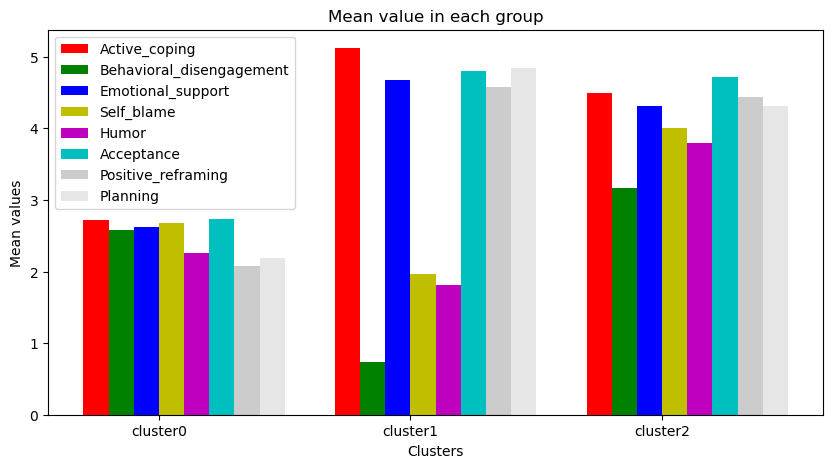

In [32]:
# visualizing the mean of features in each cluster

N = 3
ind = np.arange(3) 
width = 0.25
plt.figure(figsize=(10,5))
xvals = avg_df["Active_coping"] 
bar1 = plt.bar(ind, xvals, width=0.1, color = 'r') 

yvals = avg_df["Behavioral_disengagement"]
bar2 = plt.bar(ind+0.1, yvals, width=0.1, color='g') 

zvals = avg_df["Emotional_support"]
bar3 = plt.bar(ind+0.2, zvals, width=0.1, color = 'b') 

wvals = avg_df["Self_blame"]
bar4 = plt.bar(ind+0.3, wvals, width=0.1, color = 'y') 

tvals = avg_df["Humor"]
bar5 = plt.bar(ind+0.4, tvals, width=0.1, color = 'm')

svals = avg_df["Acceptance"]
bar6 = plt.bar(ind+0.5, svals, width=0.1, color = 'c')

bvals = avg_df["Positive_reframing"]
bar7 = plt.bar(ind+0.6, bvals, width=0.1, color = '0.8')

dvals = avg_df["Planning"]
bar8 = plt.bar(ind+0.7, dvals, width=0.1, color = '0.9') 

plt.xlabel("Clusters") 
plt.ylabel('Mean values') 
plt.title("Mean value in each group") 

plt.xticks(ind+width,['cluster0', 'cluster1', 'cluster2']) 
plt.legend( (bar1, bar2, bar3, bar4, bar5, bar6, bar7,bar8), ('Active_coping', 'Behavioral_disengagement', 
                                                         'Emotional_support','Self_blame','Humor','Acceptance','Positive_reframing','Planning') ) 
plt.show() 


### Main attributes of each cluster

Cluster 1:
This cluster includes juveniles with the most resilience. They had high average for **Active_coping, Emotional_support, Acceptance,  planning** and **Positive_reframing** and low average in *Behavioral_disengagement*, *Self_blame* and *Humor*.

Cluster 2:
juveniles with the moderate resilience. This group had moderate average in almost all features and high average for *Active_coping* and *Acceptance*.

Cluster 0:
This group had the lowest value of resilience characteristic. Active_coping, Emotional_support, Acceptance,  planning and Positive_reframing were minimum for these  juveniles.


### Results
In this project, we used k-means clustering to identify different groups of coping strategies that can affect the resilience of juveniles. Our investigations revealed that juveniles with more **Active_coping, Emotional_support, Acceptance,  planning** and **Positive_reframing** have more `resilience`. Further, *Behavioral_disengagement* and *Self_blame*  negatively affected the resilience.